[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnnyUrosevic/Machine-Learning-Shenanigans/blob/master/stock_prediction_lstm.ipynb)

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras

In [69]:
#collect data
from google.colab import files
files.upload()

{}

In [70]:
#format data
data = pd.read_csv('NFLX_data.csv')
values = data['close']

min_val = values.min()
max_val = values.max()

#scale data between 0 and 1
values = (values-values.min())/(values.max()-values.min())

LOOK_BACK = 14

def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb)])
        Y.append(data[(i+lb)])
    return np.array(X),np.array(Y)
X,y = processData(values,LOOK_BACK)

X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[0.00979159 0.00810767 0.00814059 ... 0.01149732 0.01162323 0.01367876]
 [0.00810767 0.00814059 0.01268869 ... 0.01162323 0.01367876 0.01438409]
 [0.00814059 0.01268869 0.01330715 ... 0.01367876 0.01438409 0.00992286]
 ...
 [0.42084772 0.44055719 0.44128434 ... 0.44358059 0.44759902 0.45035452]
 [0.44055719 0.44128434 0.43665357 ... 0.44759902 0.45035452 0.46195058]
 [0.44128434 0.43665357 0.44706323 ... 0.45035452 0.46195058 0.46478262]]
[[0.43665357 0.44706323 0.44480525 ... 0.46195058 0.46478262 0.46248637]
 [0.44706323 0.44480525 0.44266209 ... 0.46478262 0.46248637 0.46508879]
 [0.44480525 0.44266209 0.4560186  ... 0.46248637 0.46508879 0.45888891]
 ...
 [0.7575161  0.75866423 0.74324109 ... 0.9778412  0.945311   0.92529536]
 [0.75866423 0.74324109 0.75407173 ... 0.945311   0.92529536 0.93432728]
 [0.74324109 0.75407173 0.75456925 ... 0.92529536 0.93432728 0.88392461]]
[1.43840867e-02 9.92285751e-03 1.02072097e-02 1.08689121e-02
 1.01142116e-02 1.18310405e-02 9.50723644e-03 1.041

In [0]:
# Define Model
model = keras.Sequential()
model.add(keras.layers.LSTM(1024,input_shape=(LOOK_BACK,1)))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam',loss='mse')
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))



In [0]:
#train model
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test),shuffle=False)

Train on 995 samples, validate on 249 samples
Epoch 1/20
995/995 [==============================] - 43s 43ms/step - loss: 0.0013 - val_loss: 0.0049
Epoch 2/20
995/995 [==============================] - 39s 39ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 3/20
995/995 [==============================] - 39s 39ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 4/20
995/995 [==============================] - 39s 39ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 5/20
995/995 [==============================] - 40s 41ms/step - loss: 9.6449e-04 - val_loss: 0.0011
Epoch 6/20
995/995 [==============================] - 39s 39ms/step - loss: 6.4927e-04 - val_loss: 7.9784e-04
Epoch 7/20
995/995 [==============================] - 39s 39ms/step - loss: 5.0367e-04 - val_loss: 7.5780e-04
Epoch 8/20
995/995 [==============================] - 39s 39ms/step - loss: 4.1641e-04 - val_loss: 5.7195e-04
Epoch 9/20
995/995 [==============================] - 39s 39ms/step - loss: 2.7902e-04 - val_loss: 6.4353e-04


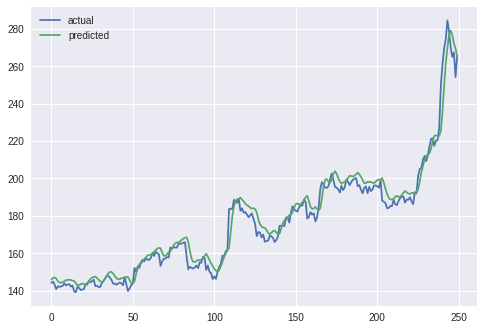

-2.002225336914064


In [66]:
Xt = model.predict(X_test)
y_test = y_test.reshape(-1,1) * (max_val - min_val) + min_val
Xt = Xt * (max_val - min_val) + min_val
plt.plot(y_test, label="actual")
plt.plot(Xt, label="predicted")
plt.legend()
plt.show()
#print("loss: {}".format(history.history['loss'][len(history.history['loss']) - 1] * (max_val - min_val)))
print((sum(y_test - Xt)/len(Xt))[0])

[[[0.8687311 ]
  [0.91086727]
  [0.94301475]
  [0.96176745]
  [1.        ]
  [0.9778412 ]
  [0.945311  ]
  [0.92529536]
  [0.93432728]
  [0.88392461]]]
            date    open     high      low   close    volume  Name
1254  2018-02-01  266.41  271.950  263.380  265.07   9669011  NFLX
1255  2018-02-02  263.00  270.620  262.710  267.43   9123610  NFLX
1256  2018-02-05  262.00  267.899  250.030  254.26  11896053  NFLX
1257  2018-02-06  247.70  266.700  245.000  265.72  12595801  NFLX
1258  2018-02-07  266.58  272.450  264.325  264.56   8981548  NFLX
[0.9249024, 0.9248742, 0.930826, 0.93950206, 0.9468995, 0.95247614, 0.95728225]


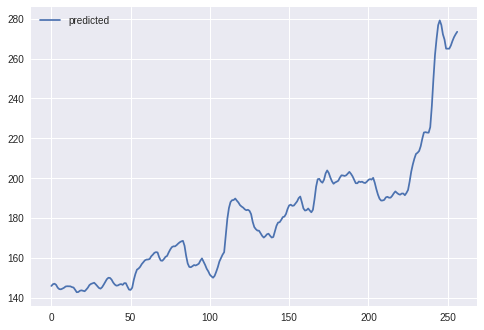

In [67]:
# 7 most recent days
recent = X_test[len(X_test) - 1].reshape(1,X_train.shape[1],1)
print(recent)
print(data.tail())

future_pred = []
for i in range(7):
    pred = list(model.predict(recent).reshape(1))[0]
    future_pred.append(pred)
    Xt = np.append(Xt, [pred * (max_val - min_val) + min_val])
    recent = list(recent.reshape(X_train.shape[1]))
    recent = recent[1:]
    recent.append(pred)
    recent = np.reshape(recent, (1, X_train.shape[1], 1))

print(future_pred)
#plt.plot(y_test, label="actual")
plt.plot(Xt, label="predicted")
plt.legend()
plt.show()